In [1]:
%pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 80.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [geopandas]/4 [geopandas]
Note: you may need to restart the kernel to use updated packages.


# EU call for action
Full text of [EU call for action](https://data.consilium.europa.eu/doc/document/ST-9198-2025-INIT/en/pdf)

Key data:
> In Lithuania: starting from 556 cases in March 2024 to 890 in October 2024 and 1185 in January 2025; 
in Latvia: from 790 cases in October 2024 to 1288 cases in January 2025; 
in Estonia: 1150 cases in October 2024 and 1085 cases in January 2025; 
in Poland: 1908 cases in October 2024 to 2732 cases in January 2025 (according to unique ICAO ID per month).

In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [3]:
eu_call_data=pd.read_csv('eu_call_data.csv',)

<Axes: title={'center': 'Cases of GNSS interference'}, xlabel='date', ylabel='unique ICAO ID per month'>

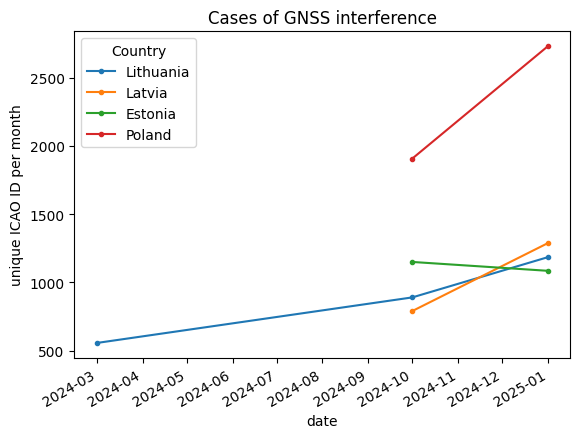

In [4]:
(eu_call_data
    .set_index('Country').T
    .reset_index()
    .rename(columns={'index':'month_year'})
    .assign(
        date= lambda df: pd.to_datetime(df.month_year,format='%Y-%m-%d')
    )
    .set_index('date')
    .plot(marker='.',ylabel='unique ICAO ID per month',title='Cases of GNSS interference')
)

Parallel growth of interference cases for 3 countries. Estonia is the exception, possibly driven by St Petersburg interference where all other countries are primarily affected by Kaliningrad interference? But aircraft interference might be from inland sources, in Russia for Estonia, Russia or Belarus for Latvia and Lithuania, and even Ukraine for Poland. 

In [14]:
world = geopandas.read_file("https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip").clip([3, 48, 42, 72]).dropna(axis='columns',how='all')

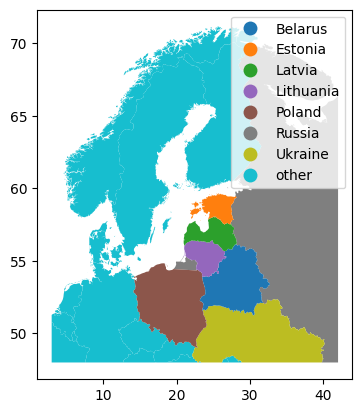

In [15]:
ax = (world
 .assign(
     colour= world.SOVEREIGNT.where(
         world.SOVEREIGNT.str.match('Estonia|Latvia|Lithuania|Poland|Russia|Belarus|Ukraine'),'other')
 )
).plot(column='colour',legend=True)
plt.show()